# BME-230B Spring 2019 HW 4 Question 
James Casaletto, Andrew Davidson, Yuanqing Xue, Jim Zheng

## <span style="color:red">TODO</span>
* 4.a does not ask for graph. its useful for debugging
* 4.b
* remove louvain debug cell
* add ref: URLS
* is this correct? did not fix the warning/errors from sc.tl.louvain and sc.tl.umap
    - see  euclid_bbknn.py _update_adata(self, l=None):
    ```
    n = self._neighbors_within_batch
    if l:
        n = self._numBatches * l

    self._adata.uns['neighbors']['params']['n_neighbors']=n
    ```

## 4.a. [10 pts] 
Turn in code that can compute a bb-l-k-NNG from a given bb-k-NNG. In addition to the input bb-k-NNG, the method should take in a parameter specifying the number of subsampled graphs that should be returned. Each of the returned subsampled graphs should represent a distinct sub-sampled bb-l-k-NNG from the given input graph. Fill in the l_k_bbknn method in euclid_bknn.py. You can set the l parameter accordingly. NOTE: in order to run this function successfully you will have to run the bbknn() method first, and then run the l_k_bbknn method. Consult example usage within euclid_bbknn.py.


In [1]:
from euclid_bbknn import bbknn_graph
# import gseapy as gp
import matplotlib.pyplot as plt
# import numpy as np
# import os


#import pandas as pd
#import scanpy.api as sc
import scanpy as sc
print("scanpy.__version__:{}".format(sc.__version__))

scanpy.__version__:1.4.1


In [2]:
%%time
anndata = sc.read("PBMC.merged.h5ad")

CPU times: user 1.62 s, sys: 173 ms, total: 1.79 s
Wall time: 1.25 s


In [3]:
%%time
# run our implementation of nearest neighboors and update anndata
bb6nn = bbknn_graph(anndata, neighbors_within_batch=6, runPCA=True, pcs=50)

CPU times: user 3min 24s, sys: 2.08 s, total: 3min 26s
Wall time: 3min 20s


In [4]:
%%time
sc.tl.louvain(anndata,
                  flavor='igraph', 
                  directed=False, 
                  use_weights=True)

CPU times: user 2.14 s, sys: 92.4 ms, total: 2.23 s
Wall time: 1.16 s


In [5]:
# save the bb6nn results. we will need them for 4.b
bb6nnConnectivities = anndata.uns['neighbors']['connectivities']
bb6nnDistances      = anndata.uns['neighbors']['distances']
bb6nnLouvain        = anndata.obs['louvain']

In [6]:
# debug
bb6nnLouvain.head()

index
data_3p-AAACCTGAGCATCATC-0    19
data_3p-AAACCTGAGCTAGTGG-0     7
data_3p-AAACCTGCACATTAGC-0     6
data_3p-AAACCTGCACTGTTAG-0     2
data_3p-AAACCTGCATAGTAAG-0     2
Name: louvain, dtype: category
Categories (23, object): [0, 1, 2, 3, ..., 19, 20, 21, 22]

In [7]:
# how to you print csr_matrix ?
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix
print(type(bb6nnConnectivities))
print(bb6nnConnectivities.shape)
print(type(bb6nnConnectivities[10:15, 0:5]))
print(bb6nnConnectivities[0:5, 0:5])

<class 'scipy.sparse.csr.csr_matrix'>
(15476, 15476)
<class 'scipy.sparse.csr.csr_matrix'>



In [8]:
## <span style="color:red">AEDWIP</span>

In [9]:
%%time
bb6nn.l_k_bbknn(l=3)
# debug 
l_k_d  = anndata.uns['neighbors']['distances']
print("type(l_k_d):{}".format(type(l_k_d)))
print("l_k_d.shape:{}".format(l_k_d.shape))
print("l_k_d:{}\n".format(l_k_d))

n:4 l - 1:2, self._numBatches: 2
type(l_k_d):<class 'scipy.sparse.csr.csr_matrix'>
l_k_d.shape:(15476, 15476)
l_k_d:  (0, 2184)	7.33763864940616
  (0, 5514)	15.19588778916719
  (0, 8883)	28.790587634543527
  (0, 13911)	14.37847204207267
  (1, 3251)	10.02835254577631
  (1, 9323)	26.07883896002164
  (2, 3910)	6.708107431810201
  (2, 5562)	3.367587365757535
  (2, 10934)	16.284217483776953
  (2, 11328)	7.910825549341226
  (3, 2635)	5.112764984031314
  (3, 3385)	10.959653174522272
  (3, 12248)	29.082092790308394
  (4, 2636)	11.086579322157895
  (4, 6609)	5.0722690555870455
  (4, 9284)	10.485573737838784
  (4, 11816)	19.380401846142565
  (5, 5715)	17.819382612560563
  (5, 14627)	33.519699790106095
  (6, 6529)	7.7444223263954886
  (6, 10059)	15.59822059467591
  (6, 14365)	7.599806979792539
  (7, 2422)	5.655380196339737
  (7, 6532)	12.748687880991602
  (7, 11066)	24.18265877510766
  :	:
  (15468, 8625)	9.294751250350476
  (15468, 13044)	4.550354075143479
  (15469, 3228)	33.75579659168643
  (15

In [10]:
%%time
sc.tl.louvain(anndata,
                  flavor='igraph', 
                  directed=False, 
                  use_weights=True)

InternalError: Error at community.c:2677: weights must be positive, Invalid value

In [11]:
# save the bb3-6nn results. we will need them for 4.b
bb3_6nnConnectivities = anndata.uns['neighbors']['connectivities']
bb3_6nnDistances      = anndata.uns['neighbors']['distances']
bb3_6nnLouvain        = anndata.obs['louvain']

In [12]:
%%time
sc.tl.umap(anndata)

/Users/andrewdavidson/anaconda3/envs/BME-230B-hw2/lib/python3.7/site-packages/scanpy/neighbors/umap/umap_.py:870: RuntimeWarning: invalid value encountered in sqrt
  D = scipy.sparse.spdiags(1.0 / np.sqrt(diag_data), 0, graph.shape[0],
/Users/andrewdavidson/anaconda3/envs/BME-230B-hw2/lib/python3.7/site-packages/scanpy/neighbors/umap/umap_.py:870: RuntimeWarning: divide by zero encountered in true_divide
  D = scipy.sparse.spdiags(1.0 / np.sqrt(diag_data), 0, graph.shape[0],


CPU times: user 7.24 s, sys: 69.1 ms, total: 7.31 s
Wall time: 5.16 s


<Figure size 720x720 with 0 Axes>

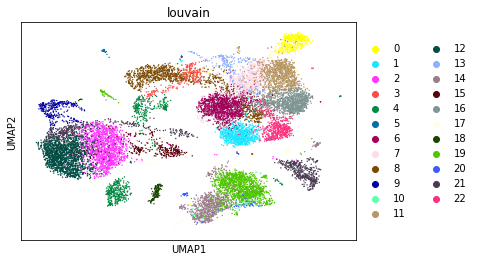

In [13]:
plt.figure(figsize=(10,10))
sc.pl.umap(anndata, color=["louvain"])

## 4.b. [10 pts] 
Turn in a bar plot of the Adjusted Rand Index (ARI) for Louvain clusters obtained from 10 independently subsampled bb-3-6-NNGs compared to the Louvain clusters obtained on the original bb-6-NNGs. Also report the average and standard deviations of the ARI. Based on these results, would you conclude these clusters are robust? Justify your answer. Hint: check if your ARI is significantly better than chance.
